In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
microarray = pd.read_csv('csv_files/microarray_new.csv')
microarray.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2037,V2038,V2039,V2040,V2041,V2042,V2043,V2044,V2045,V2046
0,A1BG,5.582546,5.316083,5.639426,5.531861,5.492184,5.619112,5.424081,5.370087,5.597164,...,5.503977,5.435669,5.291581,5.293762,5.545232,5.413534,5.326086,5.315767,5.220495,5.657885
1,A4GALT,4.588665,4.567148,4.336331,4.464754,4.454753,4.382402,4.352616,4.478181,4.816772,...,4.559906,4.542629,4.410823,4.337349,4.479923,4.414422,4.521428,4.608279,4.484420,4.604231
2,A4GNT,4.729963,4.607885,4.419786,4.691284,4.967895,4.542279,4.597191,4.618374,5.458812,...,4.604645,4.593086,4.841435,4.994085,4.337664,4.805862,4.600341,4.278393,4.554369,4.418984
3,AAAS,5.201235,4.771399,5.024912,5.222125,5.172302,4.980001,5.138890,5.060142,5.041990,...,5.044219,4.994378,4.879115,5.019100,4.932031,4.966196,5.009232,4.928180,4.983588,5.001185
4,AACS,5.516770,5.090253,5.129032,5.502365,5.142271,5.624660,5.486132,5.519051,5.317086,...,5.126910,4.503967,5.678005,5.670121,5.413771,5.265686,5.389198,5.054624,4.976820,5.459347


In [25]:
# Identifying if there are any other string columns for LabelEncoding
string_columns = microarray.select_dtypes(include=['object']).columns.tolist()
string_columns

['V1']

In [18]:
# encoding V1
le_cabin = LabelEncoder()
microarray['V1_n'] = le_cabin.fit_transform(microarray['V1'])
microarray.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2038,V2039,V2040,V2041,V2042,V2043,V2044,V2045,V2046,V1_n
0,A1BG,5.582546,5.316083,5.639426,5.531861,5.492184,5.619112,5.424081,5.370087,5.597164,...,5.435669,5.291581,5.293762,5.545232,5.413534,5.326086,5.315767,5.220495,5.657885,0
1,A4GALT,4.588665,4.567148,4.336331,4.464754,4.454753,4.382402,4.352616,4.478181,4.816772,...,4.542629,4.410823,4.337349,4.479923,4.414422,4.521428,4.608279,4.484420,4.604231,1
2,A4GNT,4.729963,4.607885,4.419786,4.691284,4.967895,4.542279,4.597191,4.618374,5.458812,...,4.593086,4.841435,4.994085,4.337664,4.805862,4.600341,4.278393,4.554369,4.418984,2
3,AAAS,5.201235,4.771399,5.024912,5.222125,5.172302,4.980001,5.138890,5.060142,5.041990,...,4.994378,4.879115,5.019100,4.932031,4.966196,5.009232,4.928180,4.983588,5.001185,3
4,AACS,5.516770,5.090253,5.129032,5.502365,5.142271,5.624660,5.486132,5.519051,5.317086,...,4.503967,5.678005,5.670121,5.413771,5.265686,5.389198,5.054624,4.976820,5.459347,4


## Define Features and Target Variables

In [26]:
x = microarray.drop('V1_n', axis=1)
y = microarray['V1_n']

In [30]:
x = pd.get_dummies(x)

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
# Initialize Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([8733.32839626, 4440.59252222, 7138.83364109, ..., 5368.70232946,
       -569.35476441, 7659.03690165])

In [36]:
model.coef_

array([  214.49787015, -1137.30618232, -1162.60251177, ...,
        3673.53450882,     0.        ,  -513.75444527])

In [37]:
model.intercept_

3405.840412072723

# MODEL EVALUATION

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print('Mean Square Error:', mse)
print('Mean Absolute Error:', mae)
print('R_square:', r2)

Mean Square Error: 11358287.054911893
Mean Absolute Error: 2745.6330999056263
R_square: -0.10334180927792436


# INTERPRETATION

In [ ]:
# MSE: 
# The average squared difference between predicted and actual values.
# Higher values indicate larger errors. The current MSE value suggests that, on average, the squared errors are quite large.

# MAE: 
# The average absolute difference between predicted and actual values. This value is easier to interpret than MSE 
# because it's in the same unit as the target variable. 
# An MAE of 2745.63 indicates that, on average, your model’s predictions are off by about 2745.63 units.

# R2: 
# A measure of how well the variance in the dependent variable is explained by the independent variables. 
# An R² of -0.103 indicates that the model is performing worse than a horizontal line representing the mean of the target values. 
# This suggests that your model does not fit the data well.

In [ ]:
# POSSIBLE IMPROVEMENTS

# MODEL SELECTION:
# Try different regression algorithms such as Random Forest, Gradient Boosting, or Support Vector Regression. 
# These models can capture more complex relationships in the data.

# HYPERPARAMETER TUNING:
# Optimize the hyperparameters of your chosen model.
# Use techniques such as Grid Search or Random Search to find the best set of hyperparameters.

# HANDLING OUTLIERS:
# Checking for outliers in the dataset. Outliers can significantly skew your model's performance.

# CROSS VALIDATION:
# Use cross-validation to ensure that your model is not overfitting or underfitting. 
# It helps in understanding how well your model generalizes to unseen data.

# REGULARIZATION:
# Apply regularization techniques such as Lasso (L1) or Ridge (L2) regression to prevent overfitting.

# PLOT

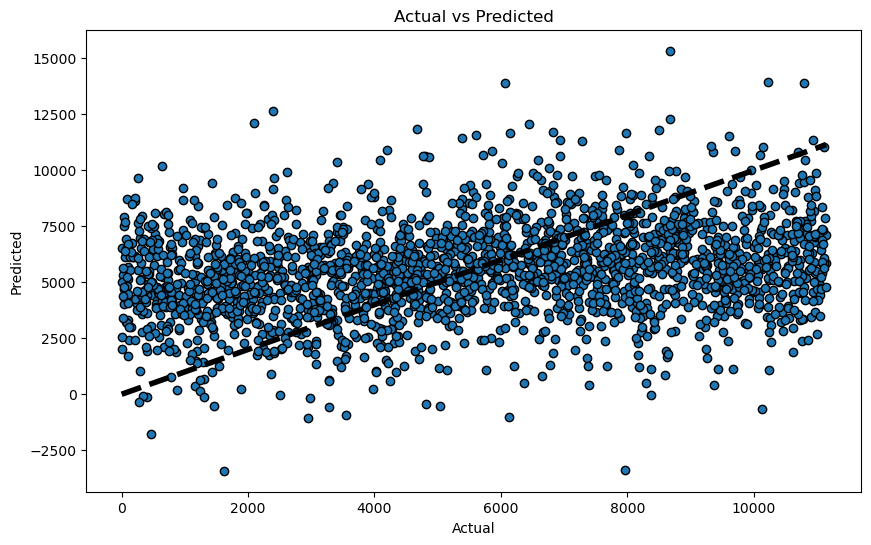

In [58]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [61]:
# INTERPRETATION

# DIAGONAL LINE (y=x)
# The black dashed line represents the ideal scenario where the predicted values perfectly match the actual values. 
# Any point on this line has a prediction error of zero.

# SCATTER POINTS:
# The blue scatter points represent the actual vs. predicted values from your model.
# Ideally, these points should be close to the diagonal line, indicating good predictions.

# DISTRIBUTION OF POINTS:
# The points are widely spread around the diagonal line, indicating a significant deviation between the actual and predicted values.
# There is a noticeable spread at higher actual values, indicating the model's performance may be less accurate for larger values.

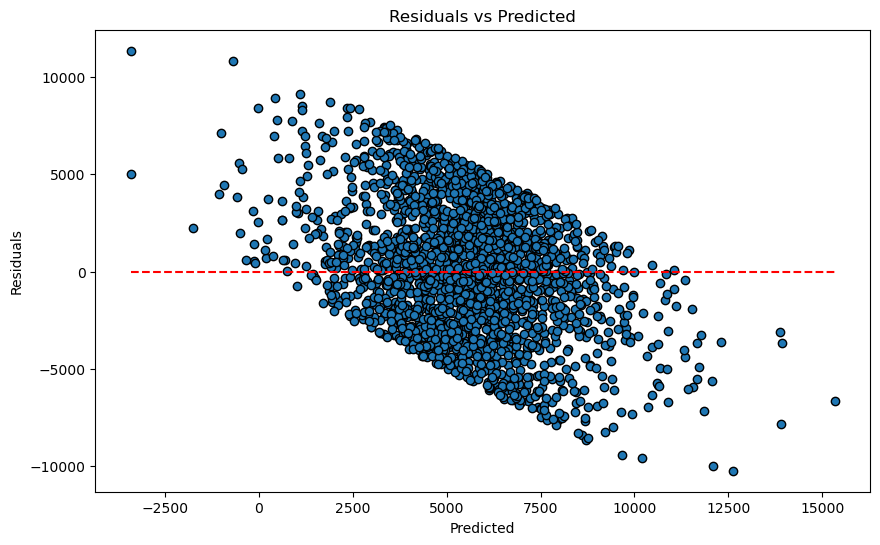

In [59]:
# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [ ]:
# INTERPRETATION
# the residuals appear to be scattered somewhat randomly around the zero line, which is a good sign. 
# There is a slight trend upwards as the predicted value increases, but it is not statistically significant.
# This suggests that the model may slightly underestimate the actual values for higher predicted values, 
# but overall it seems like a reasonable fit for the data.

# Non-random patterns: If the residuals show a non-random pattern, such as a curve or a diagonal line, 
# it suggests that the model is missing an important variable or that the relationship between the variables is not linear.

# Increasing or decreasing spread: If the spread of the residuals increases or decreases as the predicted values increase, 
# it suggests that the variance of the errors is not constant (heteroscedasticity). This can be a problem for some statistical tests.

# Outliers: If there are any outliers in the plot, 
# it suggests that there may be errors in the data or that there are influential points that are having a large impact on the model.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


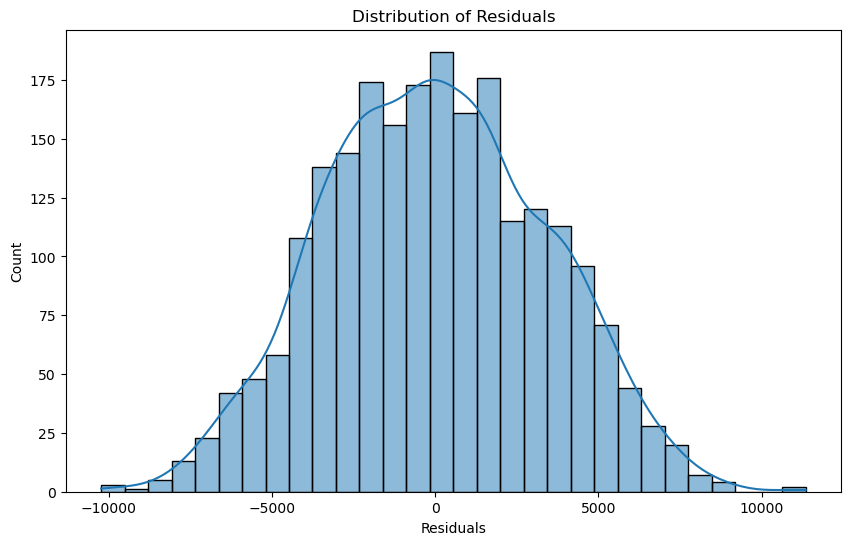

In [60]:
# Distribution Plot of Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
# INTERPRETATION

# In this specific distribution, the residuals appear to be centered around zero, which is a good sign.
# This indicates that the model’s predictions are neither consistently overestimating nor underestimating the actual values. 
# Ideally, the residuals should also be spread out normally around zero, 
# however the limited data points in the histogram make it difficult to definitively say whether the distribution is normal.

# Centering: If the residuals are not centered around zero, 
# it suggests that the model is biased. For example, if the residuals are mostly positive, 
# it means the model is consistently underestimating the actual values.

# Spread: If the spread of the residuals is uneven (heteroscedastic), 
# it can be a sign that the variance of the errors is not constant across different parts of the data. 
# This can be a problem for some statistical tests.

# Outliers: If there are any outliers in the distribution,
# it suggests that there may be errors in the data or that there are influential points that are having a large impact on the model.